In [109]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [97]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [98]:
iris = datasets.load_iris()

In [99]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [100]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [105]:
def calculateInertia(points, kmax):
  inertia = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_inertia = 0
    
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_point = points.iloc[i]
        
        for p1, p2 in zip(curr_center, curr_point):
            curr_inertia += (p1-p2)**2
    
    inertia.append(curr_inertia)
  return inertia

In [106]:
inertia = calculateInertia(df, 10)

In [107]:
inertia

[681.3705999999991,
 152.3479517603581,
 78.85144142614608,
 57.228473214285756,
 46.472230158730184,
 39.05497786747793,
 34.305815295815336,
 30.06459307359308,
 27.788744645705176,
 26.360793928293923]

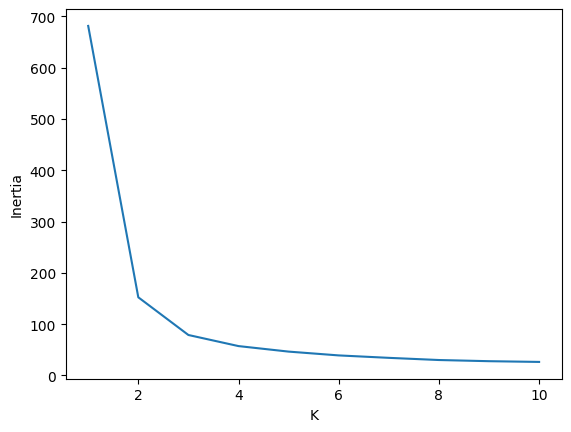

In [108]:
plt.plot([x for x in range(1, len(inertia)+1)] ,inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 3).fit(df)
preds = kmeans.predict(df)

In [110]:
pca = PCA(n_components=3).fit(df)

In [117]:
tdf = pca.transform(df)

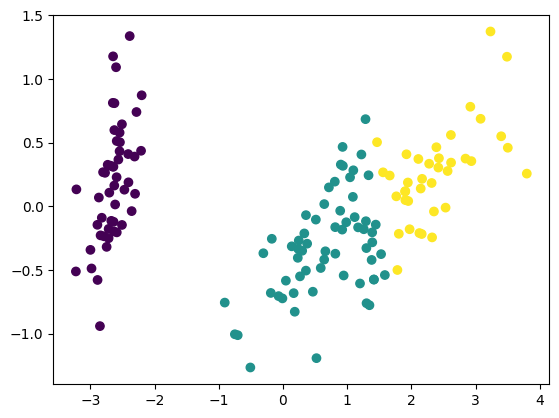

In [123]:
plt.scatter(tdf[:, 0], tdf[:, 1], c=kmeans.labels_)